<h1>By: Joel <br> Class: DAAA/2B/06<br> admin no: 2112729</h1>
<h1>

# Cifar-100 
> Collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.State of the art accuracy is at 96.808 as of 2022 

Research on the dataset:
> Cifar 100 contains 60 thousand tiny dataset images. They are colored which means they have 3 channels and each channel has 32 by 32 pixels.
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

|  SuperClass |  Classes |   
|-------------|---|
| aquatic mammals  |  	beaver, dolphin, otter, seal, whale |  
|   fish    |  	aquarium fish, flatfish, ray, shark, trout | 
|  flowers |  	orchids, poppies, roses, sunflowers, tulips |
|food containers|	bottles, bowls, cans, cups, plates |
|fruit and vegetables|apples, mushrooms, oranges, pears, sweet peppers|
|household electrical devices|clock, computer keyboard, lamp, telephone, television|
|household furniture|bed, chair, couch, table, wardrobe|
|insects|	bee, beetle, butterfly, caterpillar, cockroach|
|large carnivores|	bear, leopard, lion, tiger, wolf|
|large man-made outdoor things|	bridge, castle, house, road, skyscraper|
|large natural outdoor scenes|	cloud, forest, mountain, plain, sea|
|large omnivores and herbivores|	camel, cattle, chimpanzee, elephant, kangaroo|
| medium-sized mammals|fox, porcupine, possum, raccoon, skunk|
| non-insect invertebrates|	crab, lobster, snail, spider, worm|
|people|	baby, boy, girl, man, woman|
|reptiles|	crocodile, dinosaur, lizard, snake, turtle|
|small mammals|	hamster, mouse, rabbit, shrew, squirrel|
|trees|	maple, oak, palm, pine, willow|
|vehicles_1|	bicycle, bus, motorcycle, pickup truck, train|
|vehicles_2|	lawn-mower, rocket, streetcar, tank, tractor|

In [1]:
# pip install keras-tuner --upgrade 

In [1]:
import tensorflow 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization,LeakyReLU
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
import keras_cv
from numpy import mean
from numpy import std
from matplotlib import pyplot
from keras.optimizers import SGD
import gc
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score , confusion_matrix
from keras import layers
from keras.initializers import RandomNormal,Constant
import visualkeras

c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Cifar100 fine labels 
# Exploratory Data analysis

## Key conclusions:
- 500 data points per class in train 
- 400 data 

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [3]:
# split into train and val sets using train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print unique classes
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())


y_test_labels = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 100
4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64
after (40000, 100) (10000, 100)


In [4]:
print(y_train_df[0].value_counts())


4     400
2     400
84    400
15    400
37    400
     ... 
62    400
41    400
12    400
0     400
93    400
Name: 0, Length: 100, dtype: int64


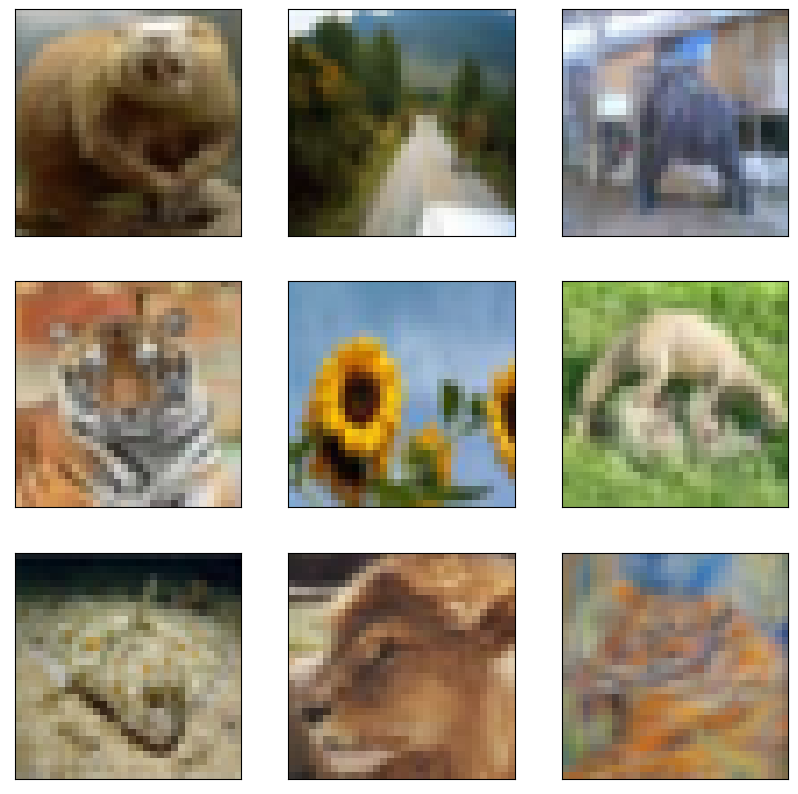

In [5]:
# show some images of the dataset
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    ax.set(xticks=[], yticks=[])
plt.show()



In [6]:
# Functions for plotting
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')
    

# CNN Baseline
> CIFAR 100 seems to be alot harder for a simple CNN model to recognize

![](./image/Filtering.gif)
> Image is different from a typical MNIST dataset as it is now coloured, below is a sneak peak of what goes on in the code below

In [7]:
def get_metrics(model,X_test = X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 128)               6422656   
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
Total params: 6,454,948
Trainable params: 6,454,948
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [========================

313/313 [==============================] - 1s 2ms/step
conv2d (3, 3, 3, 32)


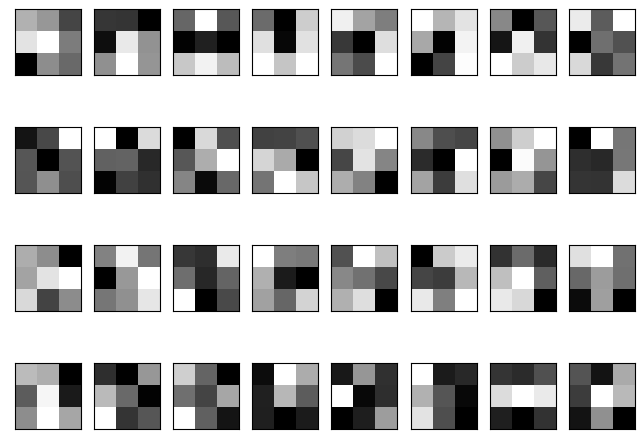

313/313 [==============================] - 0s 1ms/step


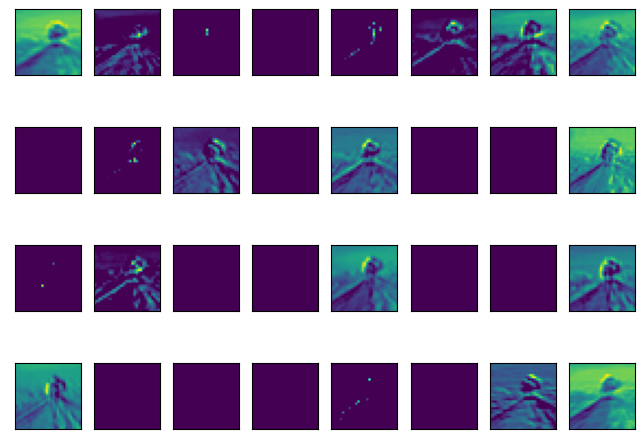

In [9]:


epochs = 15
num_classes = 100
seed = np.random.seed(1)






cifar_model = Sequential()
cifar_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3)))
cifar_model.add(Conv2D(64, (3, 3), activation='relu'))
cifar_model.add(Flatten())
cifar_model.add(Dense(128, activation='relu'))
cifar_model.add(Dense(num_classes, activation='softmax'))

cifar_model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
cifar_model.summary()

h_callback = cifar_model.fit(X_train, y_train, epochs = 10,
               validation_data=(X_val, y_val))

# Plot train vs test loss during training 
plot_accuracy_and_loss(h_callback)
# function to get precision, recall and f1 score

test_loss , test_acc = cifar_model.evaluate(X_test, y_test)


precision,recall,f1 = get_metrics(cifar_model)

# Dataframe to keep track of all model scores

Model_scores = pd.DataFrame([['CNN baseline',test_acc,test_loss,precision,recall,f1]],columns=['Model','Accuracy','Loss','Precision','Recall','F1 Score'])

#Understand the filters in the model 
#Let us pick the first hidden layer as the layer of interest.
layer = cifar_model.layers #Conv layers at 0, 
filters, biases = cifar_model.layers[0].get_weights()
print(layer[0].name, filters.shape)

# plot filters

fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer 
for i in range(1, n_filters + 1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()


# plot feature maps after first convolutional layer
from keras.models import Model
layer = cifar_model.layers[0]
intermediate_model = Model(inputs=cifar_model.input, outputs=layer.output)
intermediate_output = intermediate_model.predict(X_test)
plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = 32 ## the number of filters in our first layer
for i in range(1, n_filters + 1):
    f = intermediate_output[0, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f)



gc.collect()
tf.keras.backend.clear_session()
del cifar_model

# Data augmentation
> I definitely do not have enough datasets and will have to create more data by augmenting .

## Note
- initially augmented 40 000 extra train data but it was still not enough
- Slowly increased the number of augmented data to total of 

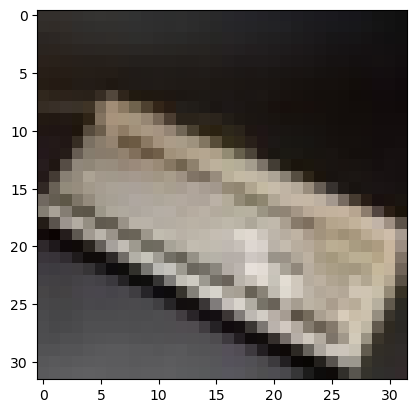

before augmentation (40000, 32, 32, 3) (40000, 100)


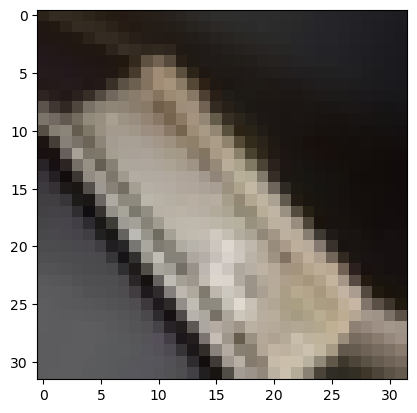

In [8]:

plt.imshow(X_train[12])
plt.show()

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255


X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()


print('before augmentation',X_train.shape,y_train.shape)





# ImageDataGenerator rotation
datagen_rotate = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
)



# ImageDataGenerator rotation
datagen_shear = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    shear_range=0.4
)


# ImageDataGenerator rotation
datagen_flip = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    horizontal_flip=True,
    vertical_flip=True)

# ImageDataGenerator rotation
datagen_channel = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    channel_shift_range=0.5
)



datagen_rotate.fit(X_train_augmented)
X_train_augmented_rotate = datagen_rotate.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_rotate = X_train_augmented_rotate[0].astype('float32')


datagen_shear.fit(X_train_augmented)
X_train_augmented_shear = datagen_shear.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_shear = X_train_augmented_shear[0].astype('float32')

datagen_flip.fit(X_train_augmented)
X_train_augmented_flip = datagen_flip.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_flip = X_train_augmented_flip[0].astype('float32')

datagen_channel.fit(X_train_augmented)
X_train_augmented_channel = datagen_channel.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_channel = X_train_augmented_channel[0].astype('float32')







# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_rotate),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)

# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_shear),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)
# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_flip),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)
# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_channel),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)

plt.imshow(X_train[40012])
plt.show()


# multiply by 2 each time it runs
datagen_mult = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90
    
)



datagen_mult.fit(X_train)
iterator = datagen_mult.flow(X_train,y_train, batch_size = X_train.shape[0], shuffle=False)
X_train_augmented1 = iterator.next()[0]
y_train_augmented = iterator.next()[1]
# change X_train_augmented to float32
X_train_augmented1 = X_train_augmented1.astype('float32')

X_train = np.concatenate((X_train,X_train_augmented1),axis=0)

y_train = np.concatenate((y_train,y_train),axis=0)




In [9]:
print('after augmentation',X_train.shape,y_train.shape)

after augmentation (400000, 32, 32, 3) (400000, 100)


In [10]:

# baseline cnn model for cifar mnist

def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['accuracy']
    val_acc = hist['val_accuracy']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename=f'accuracy-loss_{train_model}')



# evaluate a model using k-fold cross-validation
def evaluate_model(model,dataX, dataY, n_folds=5,valX=X_val,valy=y_val,X_test=X_test,y_test=y_test):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        h_callback = EarlyStopping(monitor='val_loss', patience=5)
        # fit model
        history = model.fit(trainX, trainY, epochs=50, validation_data=(testX, testY), verbose=0,callbacks=[h_callback], batch_size=32) 
        # evaluate model
        _, acc = model.evaluate(X_test, y_test, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # append scores
        scores.append(acc)
        histories.append(history)
    return scores, histories

# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(211)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(212)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        pyplot.legend()
    pyplot.show()

# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

# run the test harness for evaluating a model
def run_test_harness(model,X_train, y_train):
    # evaluate model
    scores, histories = evaluate_model(model,X_train, y_train)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    # ran into memory leakage problem trying to fix with this
    gc.collect()
    tf.keras.backend.clear_session()
    del model


def plot_loss(loss,test_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(test_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,test_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(test_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

   
# function to get precision, recall and f1 score
def get_metrics(model,X_test = X_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    precision = precision_score(y_test_labels, predictions, average='macro')
    recall = recall_score(y_test_labels, predictions, average='macro')
    f1 = f1_score(y_test_labels, predictions, average='macro')
    return precision,recall,f1


# CNNs Hypothesis testing
### Max Pooling
- With every stride the highest number found is retrieved in an area
- Effective as a noise suppresant discarding all noisy activations and only taking the prominant feature in an area 

### Average Pooling 
- Retrieves the average of all the values in an area

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

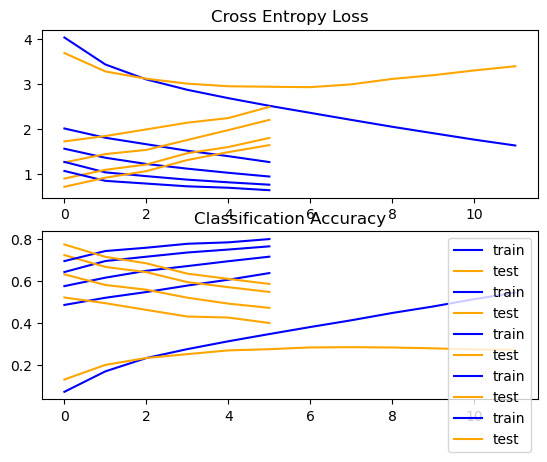

Accuracy: mean=30.198 std=1.171, n=5


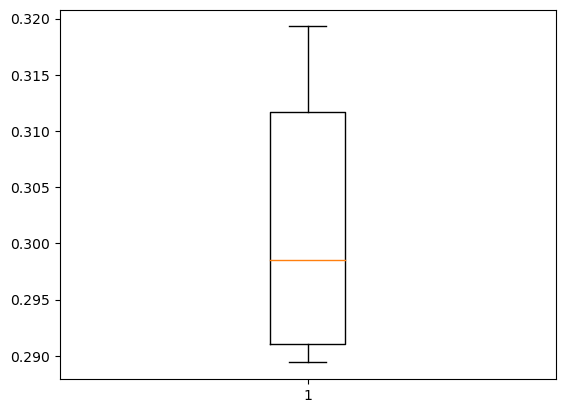

313/313 - 1s - loss: 10.6067 - accuracy: 0.2764 - 1s/epoch - 4ms/step
313/313 [==============================] - 1s 3ms/step


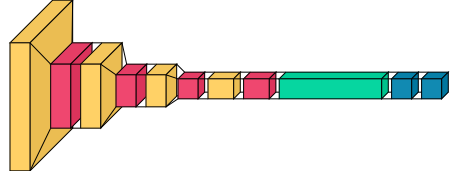

In [12]:
def model_max_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3), padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu' , padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu' , padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    model.summary()
    return model

model_max_pooling = model_max_pooling()
run_test_harness(model_max_pooling,X_train, y_train)

model_max_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = model_max_pooling.evaluate(X_test, y_test, verbose=2)
precision,recall,f1 = get_metrics(model_max_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu max pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)



visualkeras.layered_view(model_max_pooling)


> 35.570
> 35.720
> 35.100
> 35.180
> 33.640


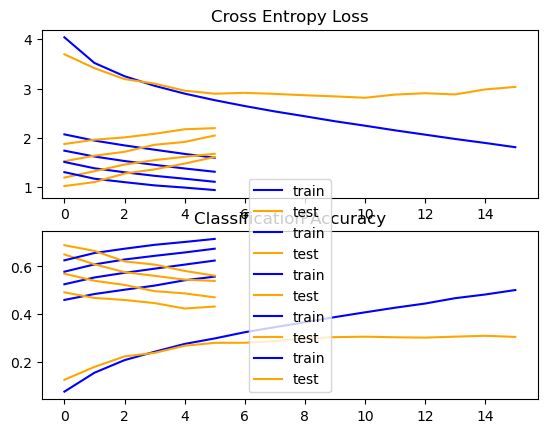

Accuracy: mean=35.042 std=0.738, n=5


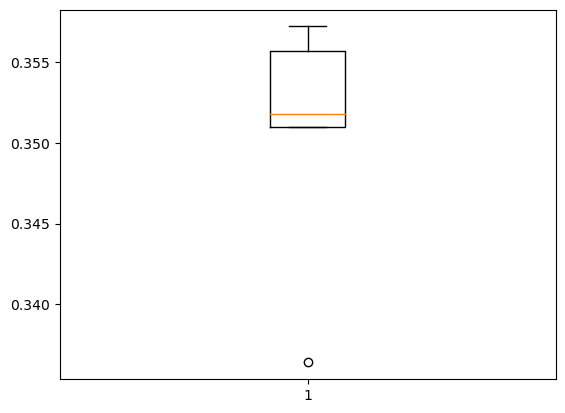

313/313 [==============================] - 1s 4ms/step


In [13]:
from keras.layers import AveragePooling2D
def model_average_pooling():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3) , padding='same'))
    model.add(AveragePooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding ='same') )
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model
model_average_pooling = model_average_pooling()
run_test_harness(model_average_pooling,X_train, y_train)



model_average_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss , test_acc = model_average_pooling.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model_average_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu avg pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


> 35.740
> 36.670
> 34.450
> 32.420
> 32.530


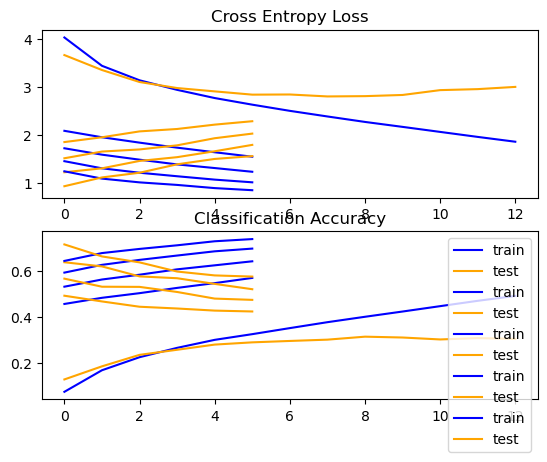

Accuracy: mean=34.362 std=1.695, n=5


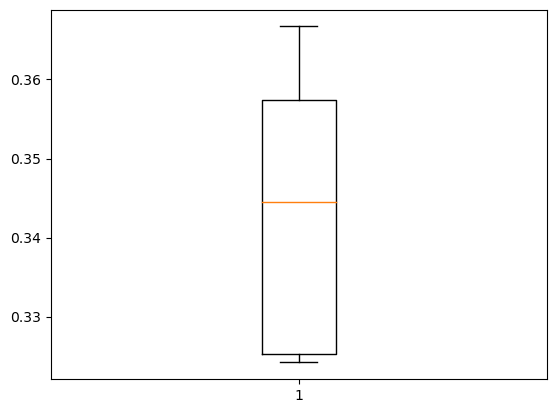

313/313 [==============================] - 1s 3ms/step


In [14]:
def model_avg_mix_max_pool():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3) , padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu' , padding='same'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu' , padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu' , padding='same'))
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model
model_avgmax_pooling = model_avg_mix_max_pool()
run_test_harness(model_avgmax_pooling,X_train, y_train)



model_avgmax_pooling.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss , test_acc = model_avgmax_pooling.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model_avgmax_pooling)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['simple CNN relu avg mix max pooling',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


### Conclusion Max Pooling or Average Pooling or Mix of both?
> I did not expect this but it seems like Average Pooling is working better than Max Pooling , I will have keep this in mind and retry Average Pooling on a deeper network later.

# Padding ( is it important? )

![](./image/padding.png) 
> Padding is important as it allows the network to learn the edges of the image. Without padding the network will not be able to learn the edges of the image and will only learn the center of the image.

> 33.820
> 33.650
> 31.330
> 31.490
> 30.030


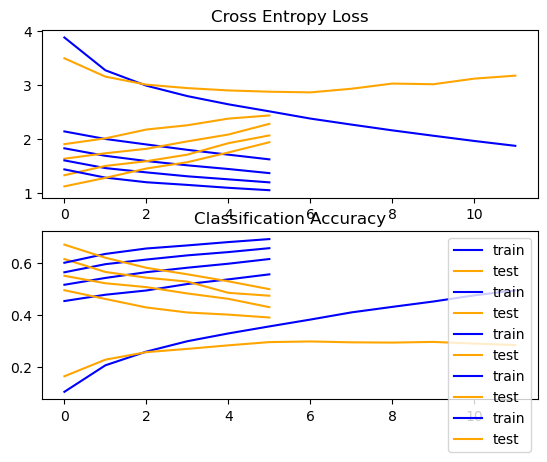

Accuracy: mean=32.064 std=1.456, n=5


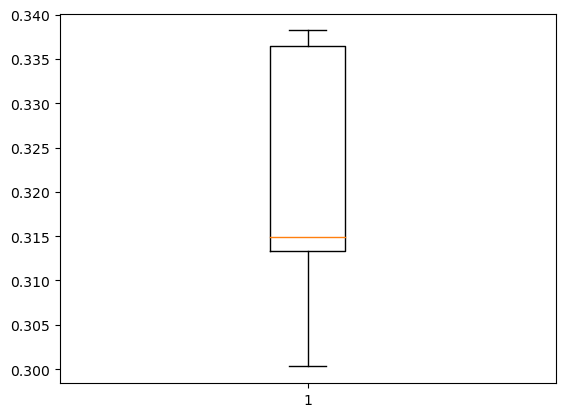

313/313 [==============================] - 1s 3ms/step


In [15]:
def model_padding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3), padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model

model_average_pooling_padding = model_padding()
visualkeras.layered_view(model_average_pooling_padding)
run_test_harness(model_average_pooling_padding,X_train, y_train)




model_average_pooling_padding.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = model_average_pooling_padding.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model_average_pooling_padding)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w same padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

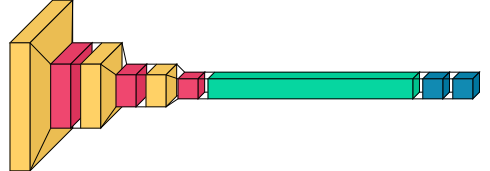

In [16]:
visualkeras.layered_view(model_average_pooling_padding)

## Valid padding

> 32.930
> 34.110
> 33.960
> 33.200
> 32.330


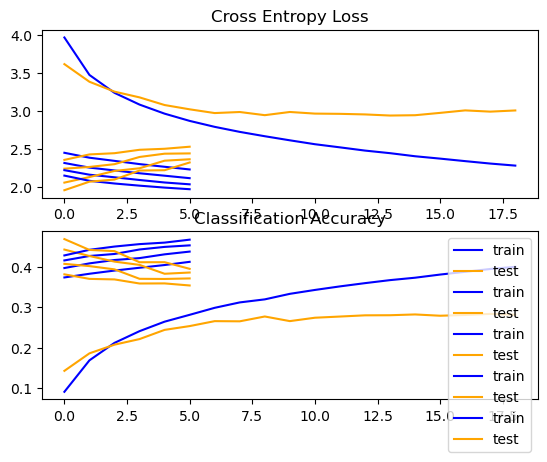

Accuracy: mean=33.306 std=0.660, n=5


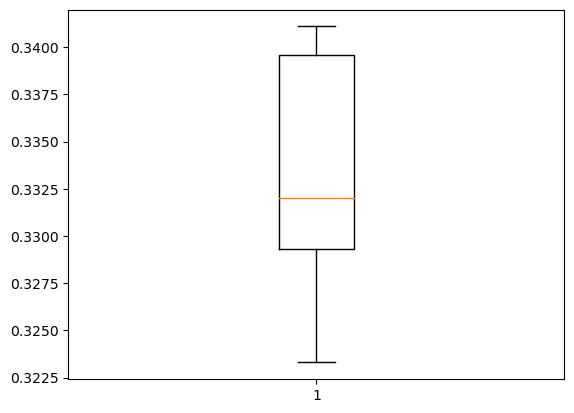

313/313 [==============================] - 1s 3ms/step


In [17]:
def model_validpadding():
    # define model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,3), padding='valid'))
    model.add(MaxPooling2D((2, 2), padding='valid'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy'])
    return model

modelmaxpool_valid_padding = model_validpadding()
run_test_harness(modelmaxpool_valid_padding,X_train, y_train)


modelmaxpool_valid_padding.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = modelmaxpool_valid_padding.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(modelmaxpool_valid_padding)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w valid padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)

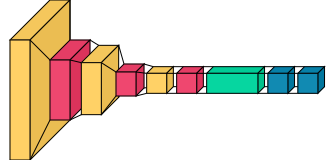

In [19]:
visualkeras.layered_view(modelmaxpool_valid_padding)

### Conclusion whether valid or padding is better
#### Winner is no padding or Valid(default) padding...

![](./image/converror.png)

> Default is valid padding which means no padding is added to the image. The image is reduced in size as the filter is moved across the image. However I will have to take note that with valid padding the image will be reduced in size and the model will not be able to learn as much as it would with padding. On top of that , the output shrinks as the filter is moved across the image with a stride of 1 if using valid padding and may cause an error if there are too many convolutional layers because the image will become of size 0 so will still have to take note of using 'same' padding.


# Before moving on with testing other parameters of CNN, I will be increasing the neurons and layers as I think im currently still underfitting as there are models that can do alot better found online. I will be adding more convolutional layers to see if it helps. 

# Batch Normalization

## Without batch normalization

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 512)       1180160   
                                                        

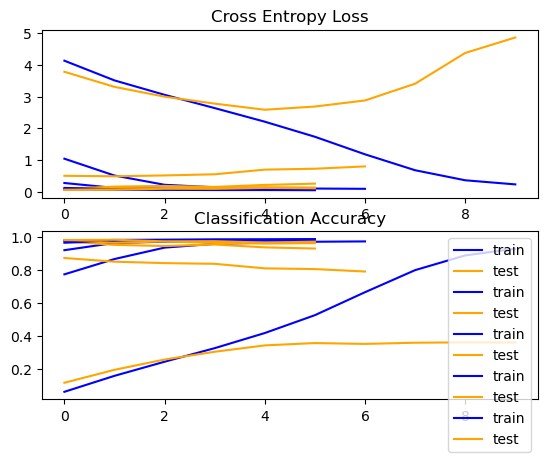

Accuracy: mean=42.388 std=0.783, n=5


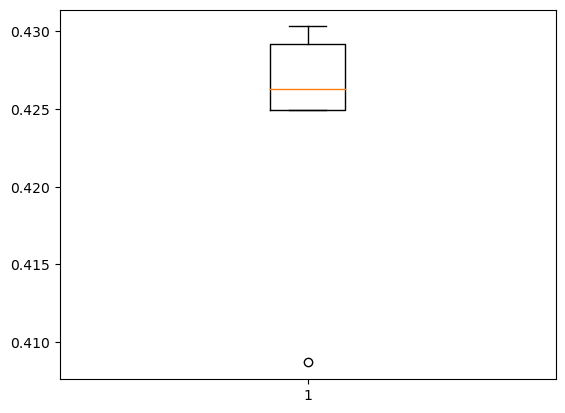

313/313 [==============================] - 6s 19ms/step


In [20]:
from keras.layers import BatchNormalization
from keras.layers import Activation
def cifar_model_no_batch_norm():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model

cifar_model_no_batch_norm = cifar_model_no_batch_norm()



run_test_harness(cifar_model_no_batch_norm,X_train, y_train)

cifar_model_no_batch_norm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = cifar_model_no_batch_norm.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(cifar_model_no_batch_norm)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN relu adamax no batch norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


In [21]:
visualkeras.layered_view(cifar_model_no_batch_norm)

In [ ]:
del cifar_model_no_batch_norm
gc.collect()
tf.keras.backend.clear_session()

## With batch normalization

In [22]:
%%time
from keras.layers import BatchNormalization,MaxPool2D

def cifar_model_batch_norm():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model


cifar_model_batch_norm = cifar_model_batch_norm()


run_test_harness(cifar_model_batch_norm,X_train, y_train)

cifar_model_batch_norm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = cifar_model_batch_norm.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(cifar_model_batch_norm)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN relu adamax w batch norm',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

In [ ]:
visualkeras.layered_view(cifar_model_batch_norm)

In [ ]:
# del cifar_model_batch_norm
# gc.collect()
# tf.keras.backend.clear_session()

# Adding dropout w batch normalization

> ALthough it is randomly dropping neruons but it generally improves the model performance. It will be good if it drops a bad neuron but even if it drops a good neuron the model still will be able to learn from other features.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

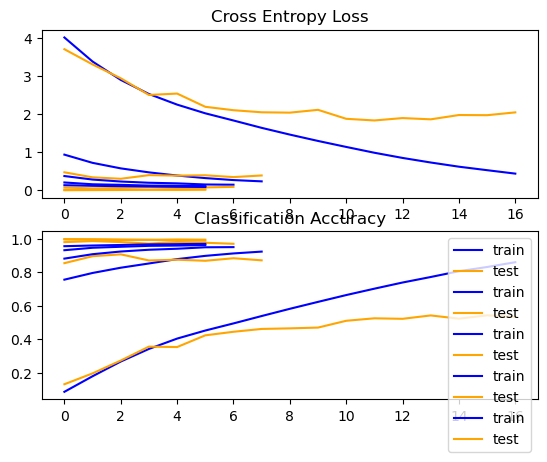

Accuracy: mean=60.752 std=1.390, n=5


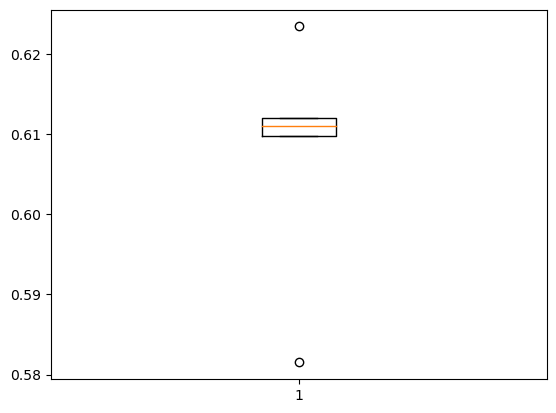

313/313 [==============================] - 4s 13ms/step


In [ ]:
def cifar_model_batch_norm_dropout():
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])
    return model
cifar_dropout = cifar_model_batch_norm_dropout()



run_test_harness(cifar_dropout,X_train, y_train)

cifar_dropout.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_acc = cifar_dropout.evaluate(X_test,y_test)
precision,recall,f1 = get_metrics(cifar_dropout)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['CNN relu avg pooling w padding ',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)


In [ ]:
print(error)
visualkeras.layered_view(cifar_dropout)
# pause program

# del cifar_dropout
# gc.collect()
# tf.keras.backend.clear_session()

# Best Optimizers with Activation function

In [12]:
### function for looping through all the models

def tune_model_act_opt(act,opt):
    model = Sequential()
    
    model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3), kernel_initializer=keras.initializers.GlorotNormal(seed=42)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(256,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Conv2D(512,(3,3),padding='same'))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(BatchNormalization(momentum=0.95, 
            epsilon=0.005,
            beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
            gamma_initializer=Constant(value=0.9)))
    model.add(Dense(100,activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(histories,act,opt):
		# plot loss
	pyplot.subplot(211)
	pyplot.title(f'Cross Entropy Loss {act},{opt}')
	pyplot.plot(histories.history['loss'], color='blue', label='train')
	pyplot.plot(histories.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title(f'Classification Accuracy {act},{opt}')
	pyplot.plot(histories.history['accuracy'], color='blue', label='train')
	pyplot.plot(histories.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()
	pyplot.show()

def run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val):
    model = tune_model_act_opt(act,opt)
    # fit model
    h_callback = EarlyStopping(monitor='val_accuracy', patience=5)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
    history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_val, y_val), verbose=0 ,callbacks=[h_callback,reduce_lr])
    # evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    # ran into memory leakage problem trying to fix with this
    gc.collect()
    tf.keras.backend.clear_session()
    del model
    print('Test Accuracy>  %.3f' % (test_acc * 100.0))
    print('Test Loss>  %.3f' % (test_loss * 100.0))
    summarize_diagnostics(history,act,opt)
    return (test_acc*100, test_loss*100)
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

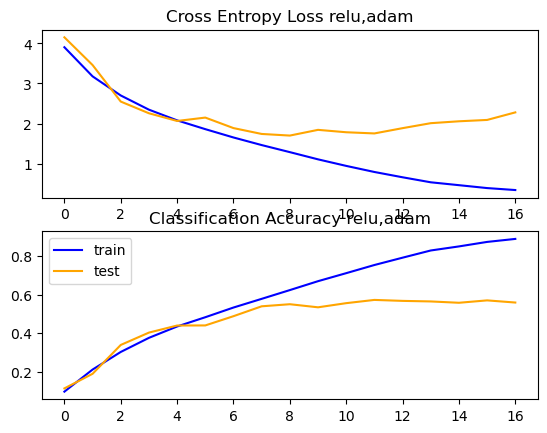

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

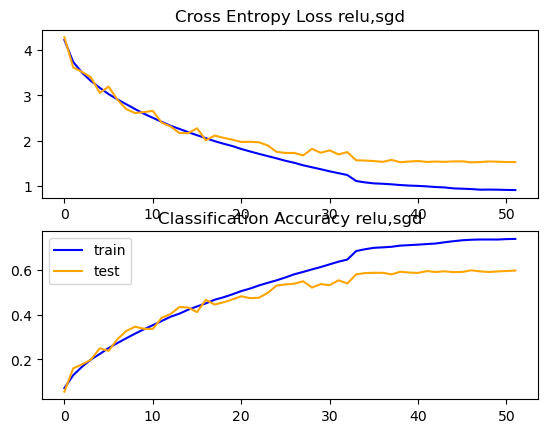

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

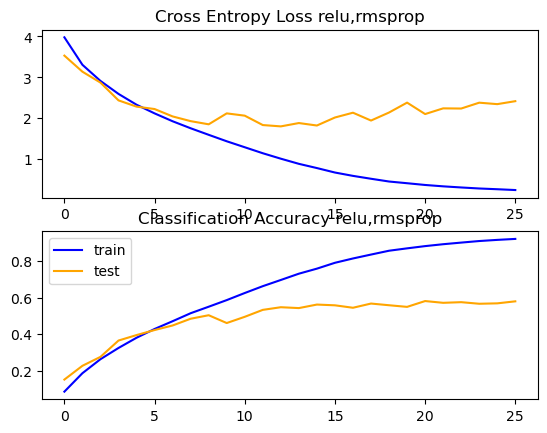

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

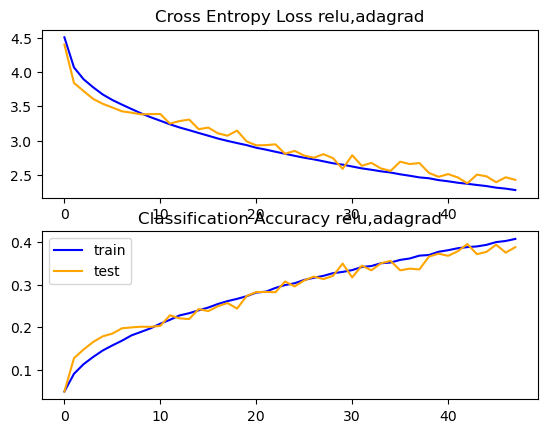

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

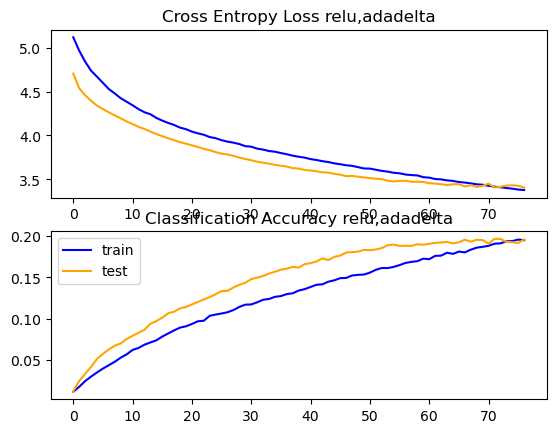

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

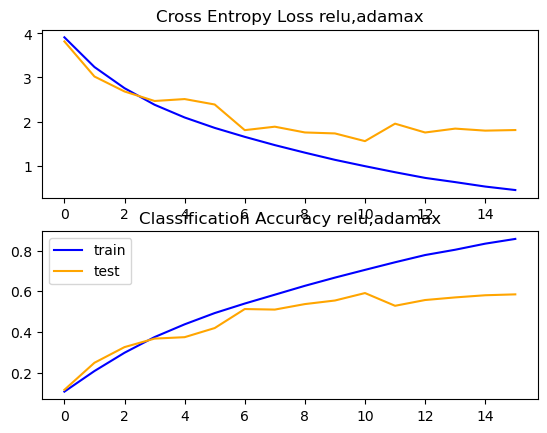

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

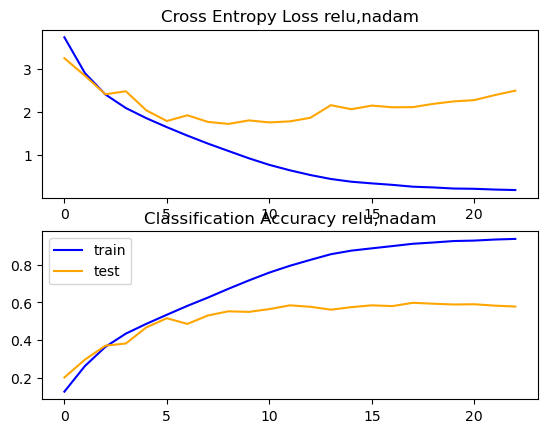

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

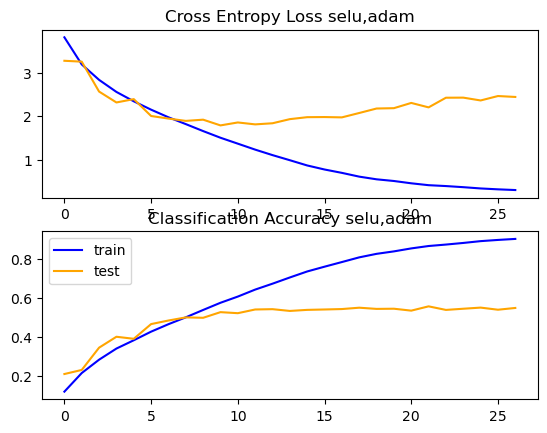

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

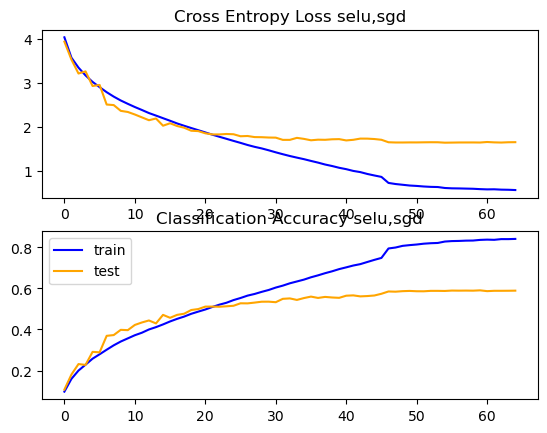

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

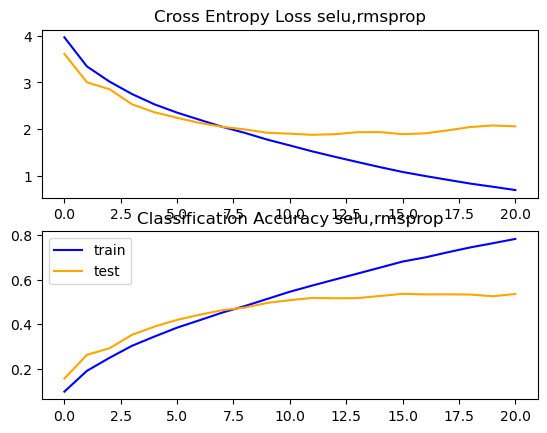

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

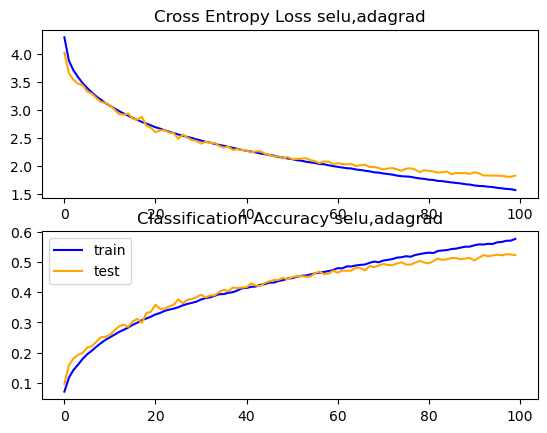

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

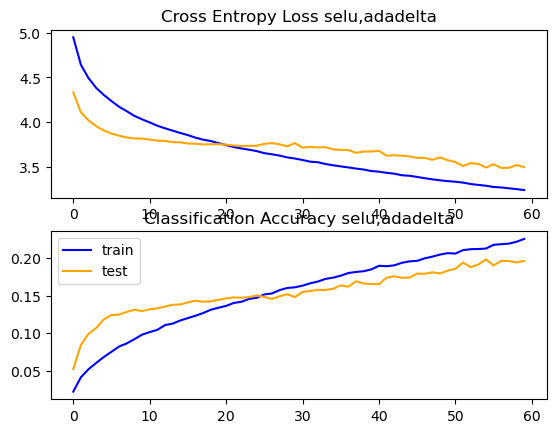

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

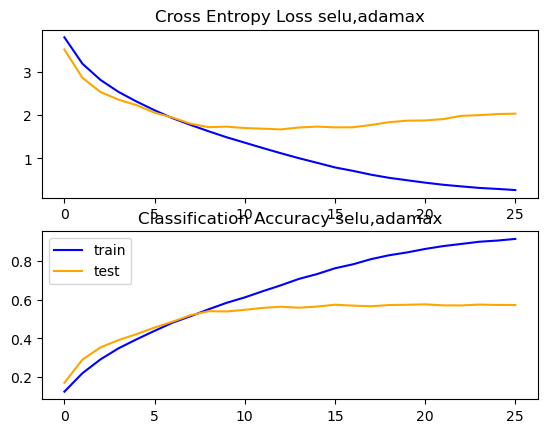

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

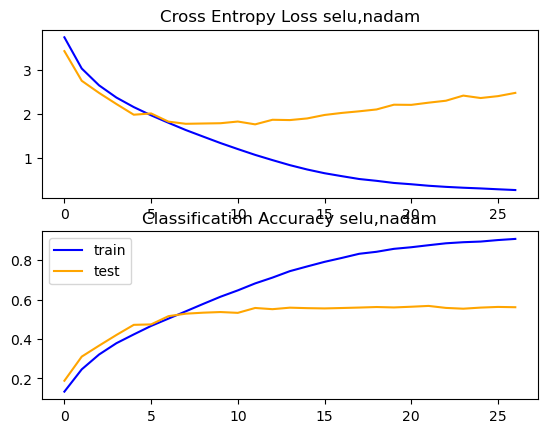

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

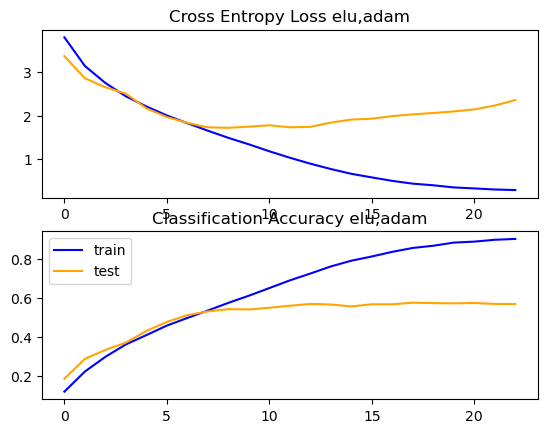

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

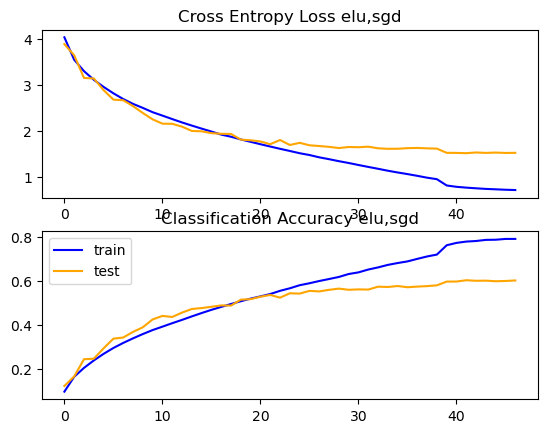

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

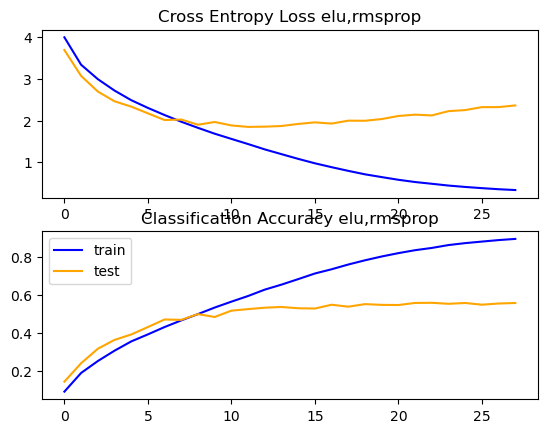

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

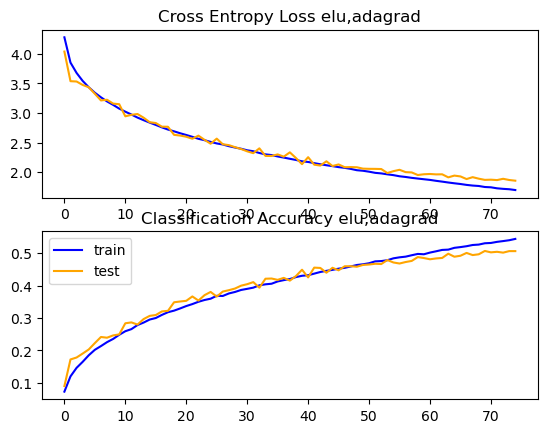

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

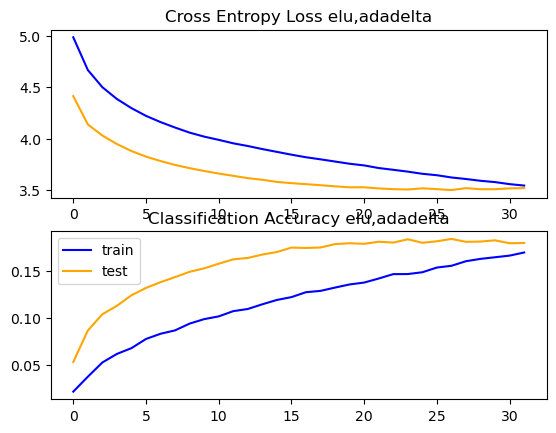

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

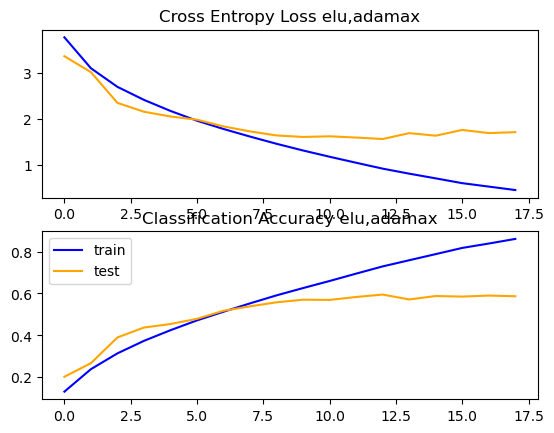

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

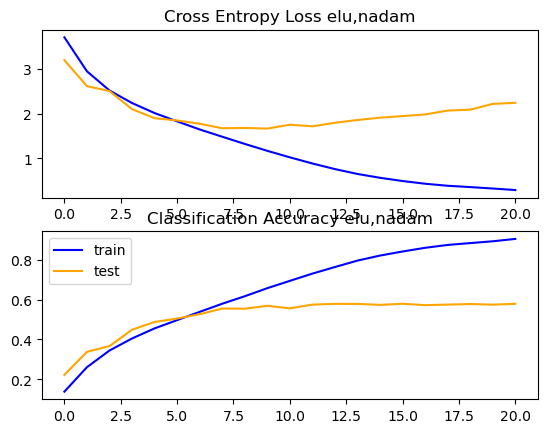

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

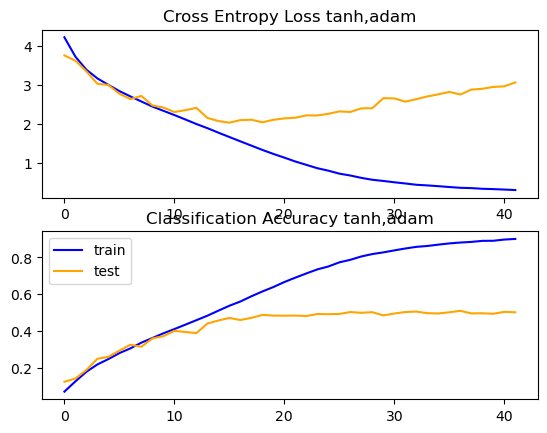

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

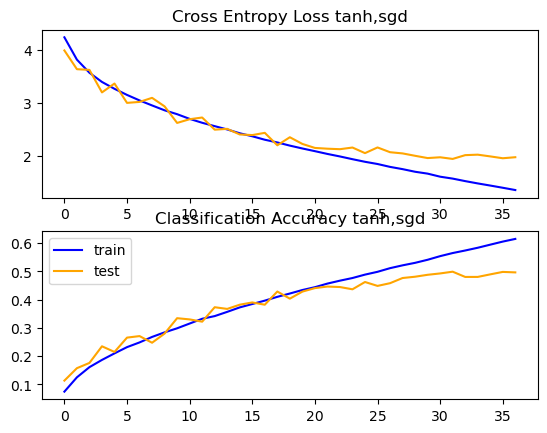

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

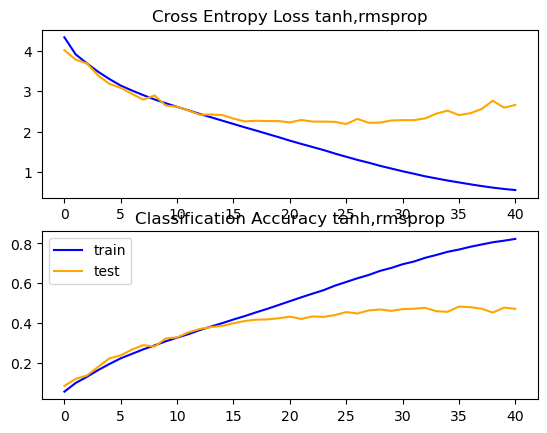

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

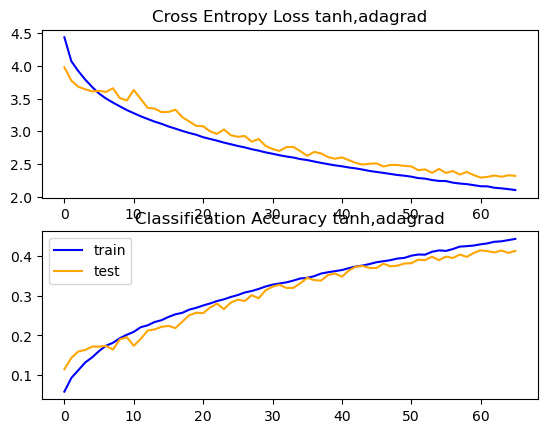

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

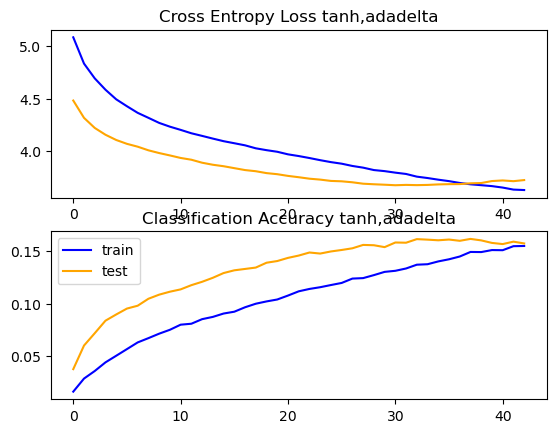

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

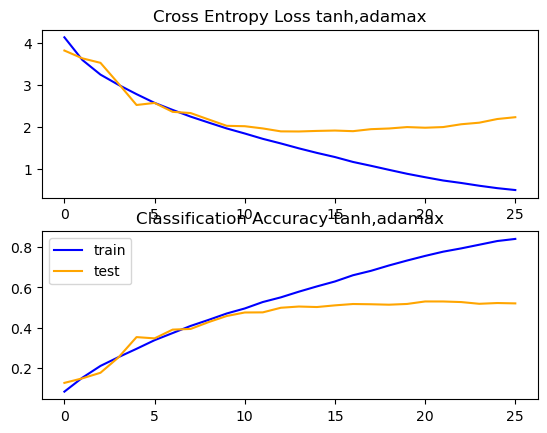

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

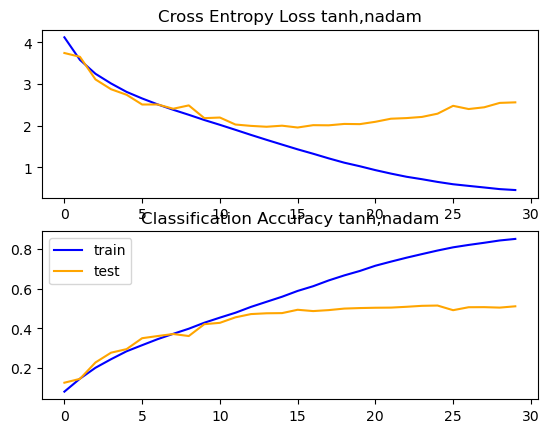

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

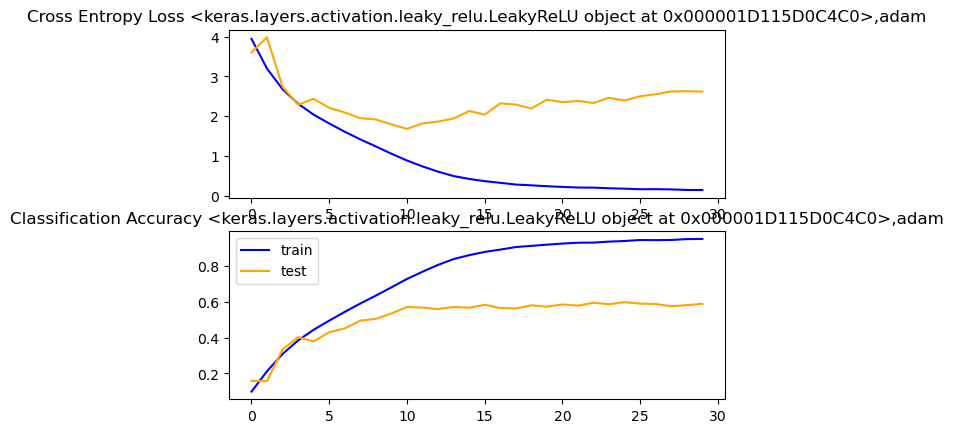

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

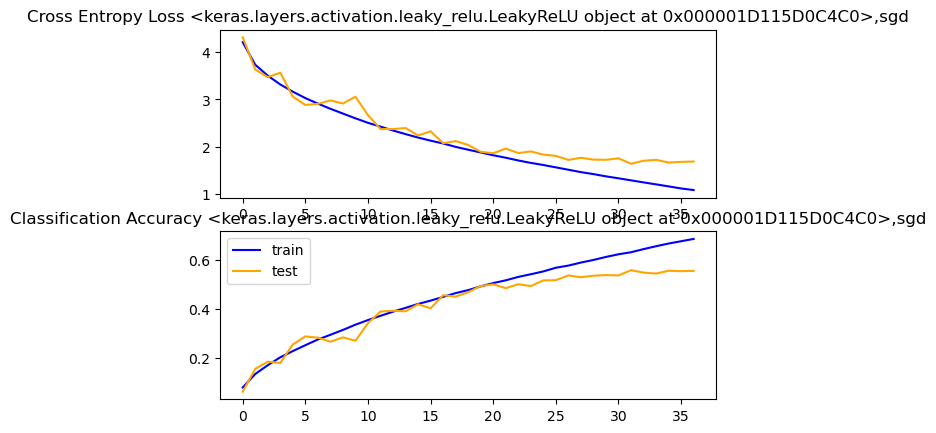

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

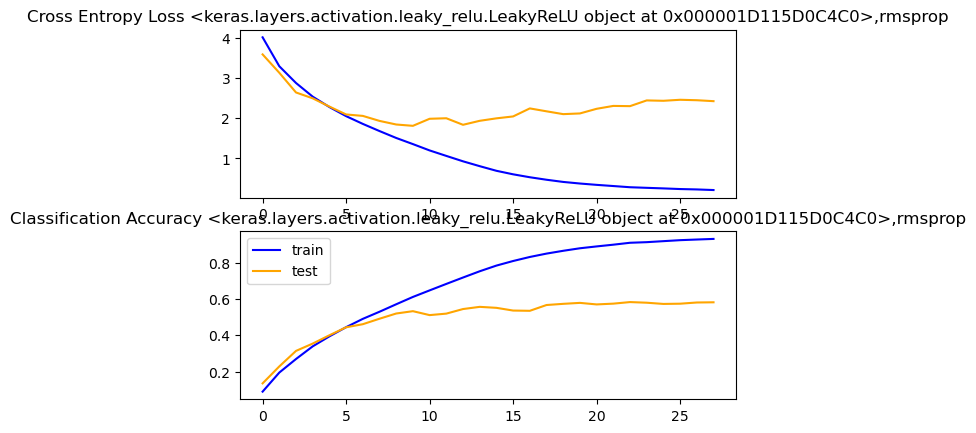

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 256)       0

InternalError: Could not synchronize CUDA stream: CUDA_ERROR_ILLEGAL_ADDRESS: an illegal memory access was encountered

In [23]:
from itertools import product
optimizers = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']
activation = ['relu', 'selu', 'elu', 'tanh',LeakyReLU(alpha=0.01)]
accuracy_act_opt = list()
loss_act_opt = list()
activation_names = ['relu', 'selu', 'elu', 'tanh','LeakyReLU']
act_opt = list(product(activation_names,optimizers))

for act,opt in product(activation,optimizers):
    acc , loss= run_test_harness_act_opt(act,opt,X_train, y_train, X_test, y_test,X_val,y_val)
    accuracy_act_opt.append(acc)
    loss_act_opt.append(loss)

    



In [24]:
# create a dataframe of scores_act_opt and act_opt
df_act_opt = pd.DataFrame({'act_opt':act_opt,'accuracy':accuracy_act_opt,'loss':loss_act_opt})
# highlight highest score_act_opt in df_act_opt
df_act_opt.style.highlight_max(subset=['accuracy'],color='green', axis=0).highlight_min(subset=['loss'],color='green', axis=0)

# style only score_act_opt in df_act_opt




ValueError: All arrays must be of the same length

# Notable pairs
- leaky relu adam 59.92
- elu adamax 59.84
- elu adam 57.22
- elu sgd 60.9
- elu adamax 58.84
- relu sgd 59.99



In [25]:
Model_scores

,Model,Accuracy,Loss,Precision,Recall,F1 Score
0,CNN baseline,0.0937,16.984434,0.094939,0.0937,0.090659
1,simple CNN relu max pooling,0.0937,16.984434,0.289353,0.2780,0.279113
2,simple CNN relu avg pooling,0.0937,16.984434,0.329643,0.3260,0.324001
3,simple CNN relu avg mix max pooling,0.0937,16.984434,0.310743,0.3080,0.305592
4,CNN relu avg pooling w same padding,0.0937,16.984434,0.277890,0.2760,0.274180
5,CNN relu avg pooling w valid padding,0.0937,16.984434,0.301405,0.3016,0.296297
6,deep CNN relu adamax no batch norm,0.0937,16.984434,0.418090,0.4177,0.412984
7,deep CNN relu adamax w batch norm,0.0937,16.984434,0.586022,0.5836,0.581206
8,CNN relu avg pooling w padding,0.0937,16.984434,0.645589,0.6399,0.638492


# Regularization 
## L1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

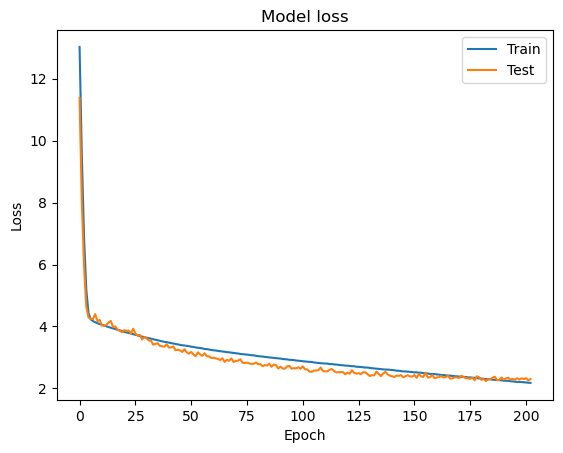

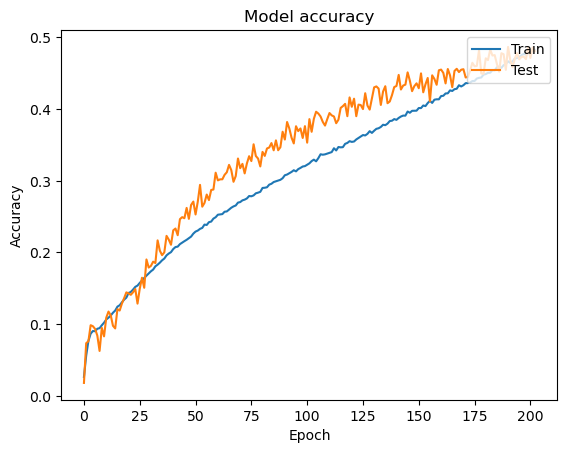

313/313 [==============================] - 2s 6ms/step


c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



NameError: name 'Model_scores' is not defined

In [11]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L1(0.01)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 300,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu sgd batchnorm dropout l1',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)




In [12]:
visualkeras.layered_view(model,legend=True).show() # display using your system viewer

## L2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

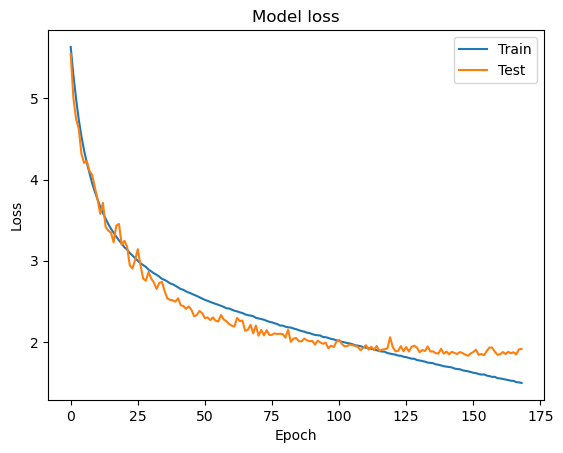

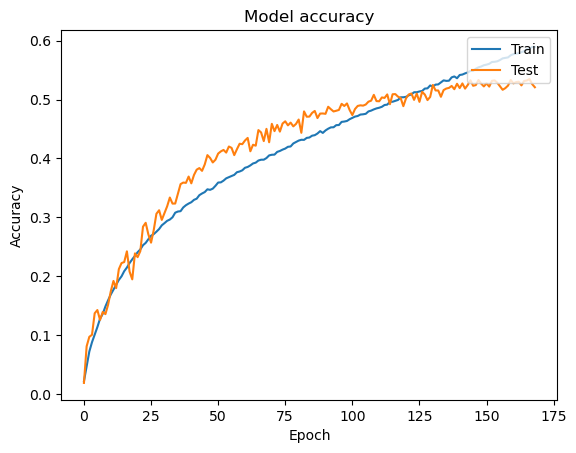

313/313 [==============================] - 2s 5ms/step


In [13]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.01)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 300,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model)
# Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu sgd batchnorm dropout l1',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)




In [ ]:
visualkeras.layered_view(model)


del model

## L1L2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

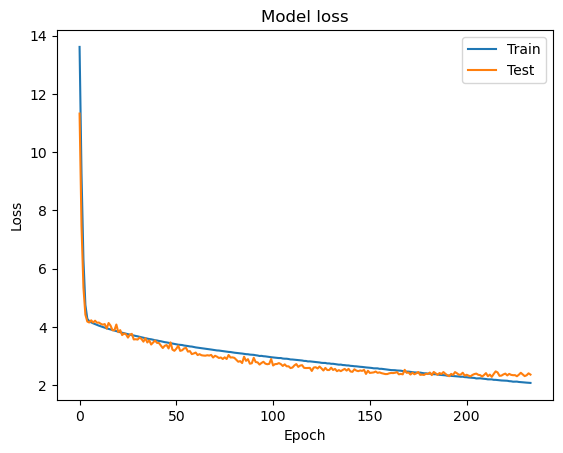

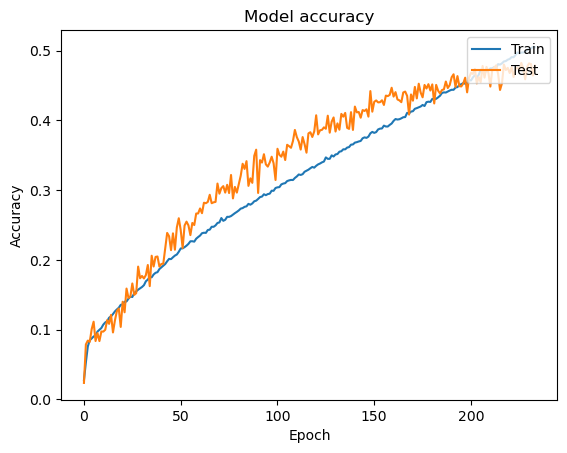

313/313 [==============================] - 2s 5ms/step


c:\Users\Admin\.conda\envs\gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [13]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L1L2(l1=0.01,l2=0.01)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)

h_callback = model.fit(X_train, y_train, epochs = 300,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
precision,recall,f1 = get_metrics(model)
Model_scores = pd.concat([Model_scores,pd.DataFrame([['deep CNN elu sgd batchnorm dropout l1l2',test_acc,test_loss,precision,recall,f1]],columns=Model_scores.columns)],ignore_index=True)





In [14]:
visualkeras.layered_view(model,legend=True).show() # display using your system viewer
# del model

In [ ]:
Model_scores

# Mid way review of models
- Average pooling seems to be better
- Cifar 100 is a lot harder to classify than MNIST
- Batch Normalization w dropout worked best for a better val accuracy
- Go easy on the dropout and regularization first and try to build a better fitted model


## Focussing on elu
![elu](./image/elualpha0.png)

![elu](./image/elualpha1.png)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

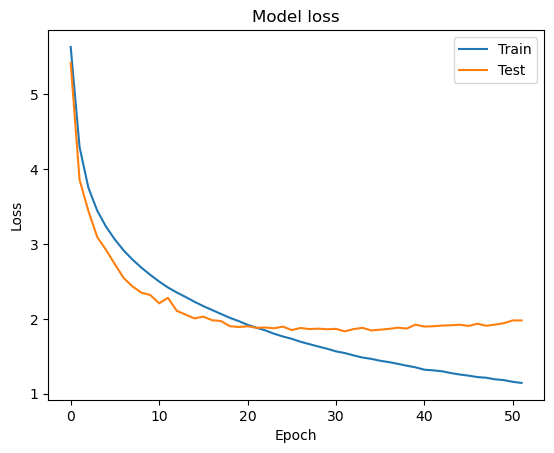

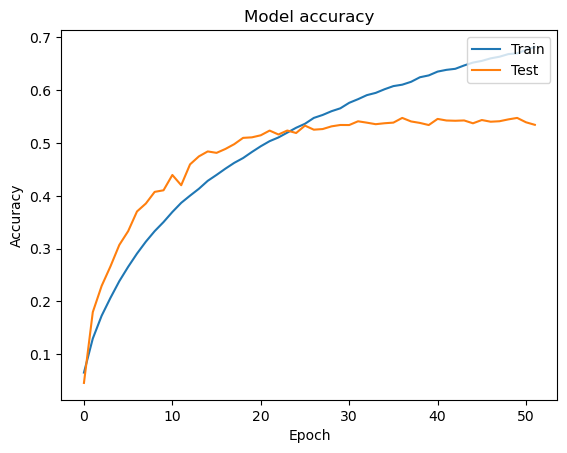

In [15]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.02)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('finemodel1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

h_callback = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping,mc])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [16]:
plot_accuracy_and_loss(h_callback)

## Model 2 from original

## Model was overfitting so I will be adding more dropout and higher regularization and also reducing layers to see if it helps
- train acuracy 0.756 but val accuracy 0.592

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

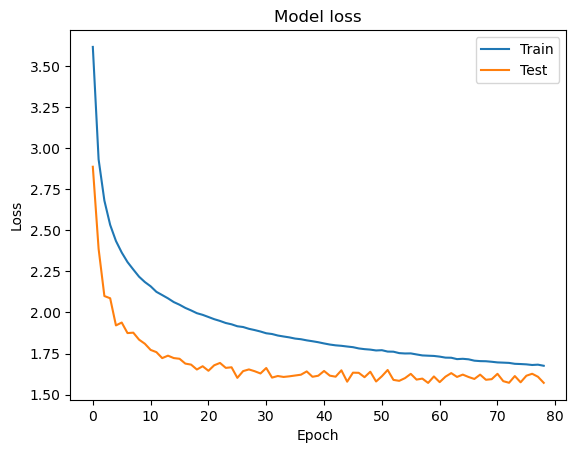

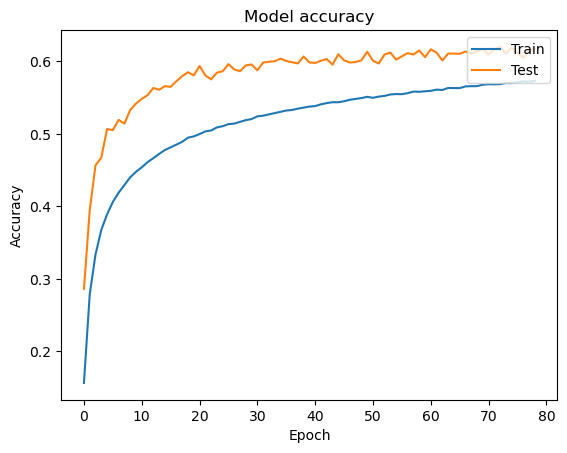

In [11]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.01)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('finemodel2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

h_callback = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val, y_val),batch_size=128,callbacks=[mc,early_stopping,reduce_lr])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


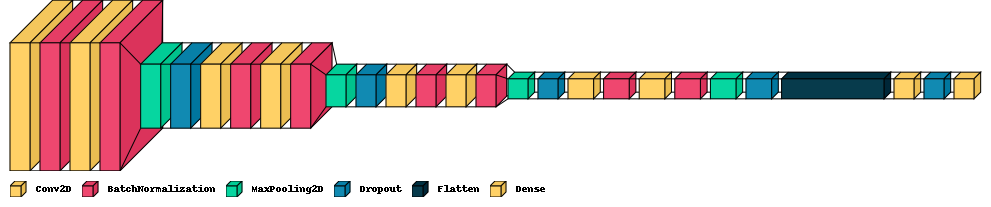

In [12]:
visualkeras.layered_view(model,legend=True)

## 0.61890 val accuracy

# Transfer Learning with EfficientNetB0

In [17]:
import efficientnet.keras as efn
from keras.layers import GlobalAveragePooling2D
efnb0 = efn.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32,32,3), classes=100)

model = Sequential()
model.add(efnb0)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

16804768/16804768 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 1, 1, 1280)       4049564   
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               128100    
                                                                 
Total params: 4,177,664
Trainable params: 4,135,648
Non-trainable params: 42,016
________________________________________

In [21]:
model.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('efficientnetB0.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[early_stopping,reduce_lr,mc])
test_loss,test_acc=model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Epoch 1/100
1250/1250 [==============================] - ETA: 0s - loss: 4.4852 - accuracy: 0.0763
Epoch 1: val_accuracy improved from -inf to 0.20820, saving model to efficientnetB0.h5
1250/1250 [==============================] - 68s 50ms/step - loss: 4.4852 - accuracy: 0.0763 - val_loss: 3.4620 - val_accuracy: 0.2082 - lr: 0.0100
Epoch 2/100
1250/1250 [==============================] - ETA: 0s - loss: 3.3308 - accuracy: 0.2153
Epoch 2: val_accuracy improved from 0.20820 to 0.32630, saving model to efficientnetB0.h5
1250/1250 [==============================] - 61s 49ms/step - loss: 3.3308 - accuracy: 0.2153 - val_loss: 2.7290 - val_accuracy: 0.3263 - lr: 0.0100
Epoch 3/100
1249/1250 [============================>.] - ETA: 0s - loss: 2.7983 - accuracy: 0.3032
Epoch 3: val_accuracy improved from 0.32630 to 0.38890, saving model to efficientnetB0.h5
1250/1250 [==============================] - 61s 48ms/step - loss: 2.7979 - accuracy: 0.3034 - val_loss: 2.4184 - val_accuracy: 0.3889 - lr:

# Exploring on Cifar 100 (coarse) 20 classes

In [13]:
# import cifar 10
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode="coarse")
assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# split train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)

# print unique classes count
print("Unique classes count:", len(np.unique(y_train)))

# print number of samples in each class
y_train_df = pd.DataFrame(y_train)
print(y_train_df[0].value_counts())

y_test_label = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
print('after',y_train.shape,y_test.shape)


X_train shape: (40000, 32, 32, 3) y_train shape: (40000, 1)
X_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)
Unique classes count: 20
1     2000
18    2000
10    2000
5     2000
8     2000
6     2000
13    2000
7     2000
17    2000
15    2000
14    2000
4     2000
2     2000
3     2000
16    2000
11    2000
12    2000
0     2000
9     2000
19    2000
Name: 0, dtype: int64
after (40000, 20) (10000, 20)


# Data augmentation

## Feature wise Normalizaion, Centering or Standardization does it help?

- Pixel Normalization: scale pixel values to the range 0-1. 
- Pixel Centering: scale pixel values to have a zero mean. (images seem to be already centered)
- Pixel Standardization: scale pixel values to have a zero mean and unit variance. (Images are already standardized as they all have pixels from 0 to 255)

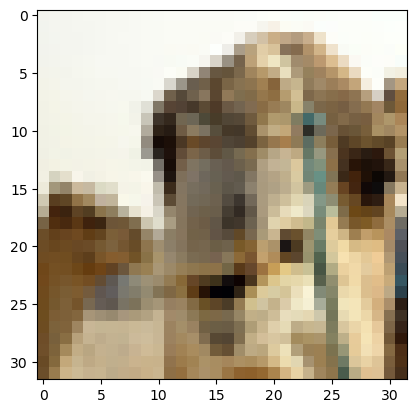

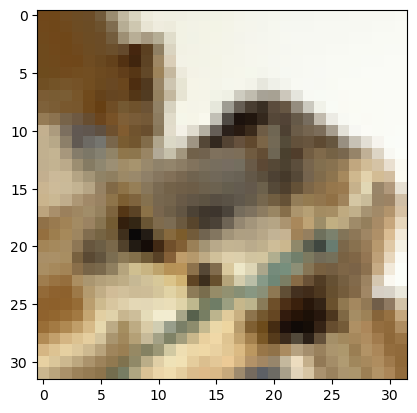

In [14]:

plt.imshow(X_train[12])
plt.show()

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255


X_train_augmented = X_train.copy()
y_train_augmented = y_train.copy()

X_train_aug = X_train.copy()
y_train_aug = y_train.copy()






# ImageDataGenerator rotation
datagen_rotate = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=90,
)



# ImageDataGenerator rotation
datagen_shear = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    shear_range=0.4
)


# ImageDataGenerator rotation
datagen_flip = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    horizontal_flip=True,
    vertical_flip=True)

# ImageDataGenerator rotation
datagen_channel = ImageDataGenerator(
	featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    channel_shift_range=0.5
)



datagen_rotate.fit(X_train_augmented)
X_train_augmented_rotate = datagen_rotate.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_rotate = X_train_augmented_rotate[0].astype('float32')


datagen_shear.fit(X_train_augmented)
X_train_augmented_shear = datagen_shear.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_shear = X_train_augmented_shear[0].astype('float32')

datagen_flip.fit(X_train_augmented)
X_train_augmented_flip = datagen_flip.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_flip = X_train_augmented_flip[0].astype('float32')

datagen_channel.fit(X_train_augmented)
X_train_augmented_channel = datagen_channel.flow(X_train_augmented,y_train_augmented, batch_size = X_train_augmented.shape[0], shuffle=False).next()
# change X_train_augmented to float32
X_train_augmented_channel = X_train_augmented_channel[0].astype('float32')








# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_rotate),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)

# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_shear),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)
# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_flip),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)
# concat the original and augmented data
X_train = np.concatenate((X_train,X_train_augmented_channel),axis=0)

y_train = np.concatenate((y_train,y_train_augmented),axis=0)

plt.imshow(X_train[40012])
plt.show()

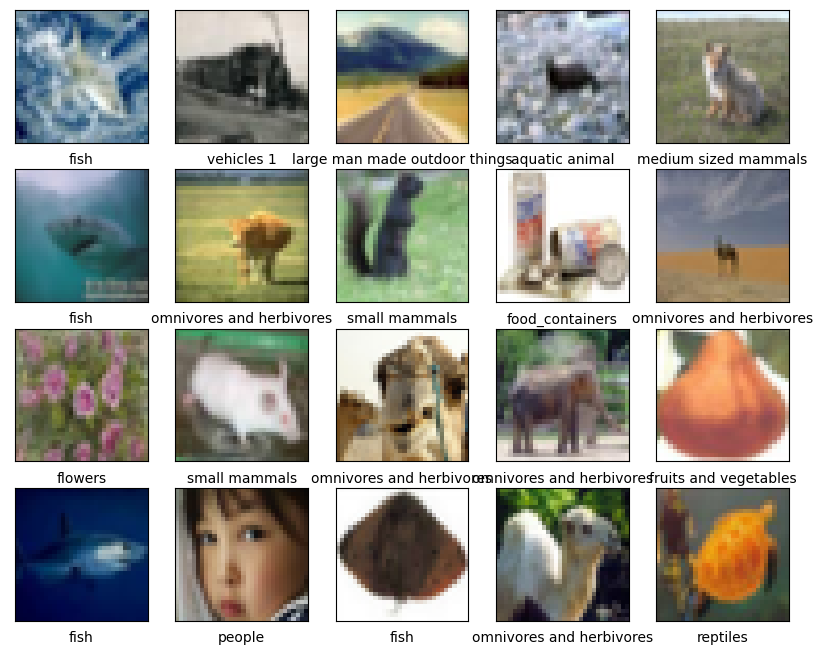

In [36]:
#names of each class 
class_names = ['aquatic animal', 'fish','flowers','food_containers','fruits and vegetables','household electronic','household furniture','insects','large carnivores','large man made outdoor things','outdoor scenes','omnivores and herbivores','medium sized mammals','non-insect invertebrates','people','reptiles','small mammals','trees','vehicles 1','vehicles 2']

# plot the first 25 images in the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

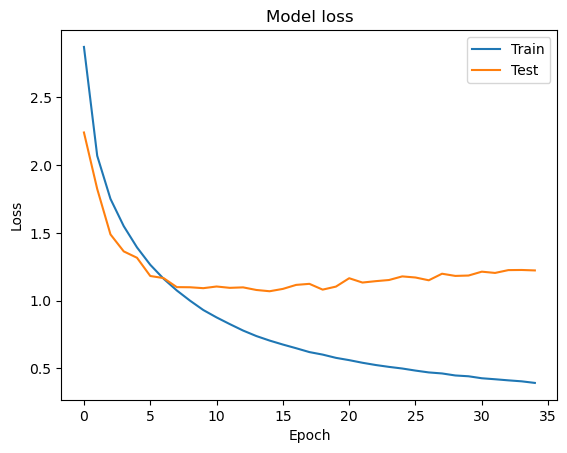

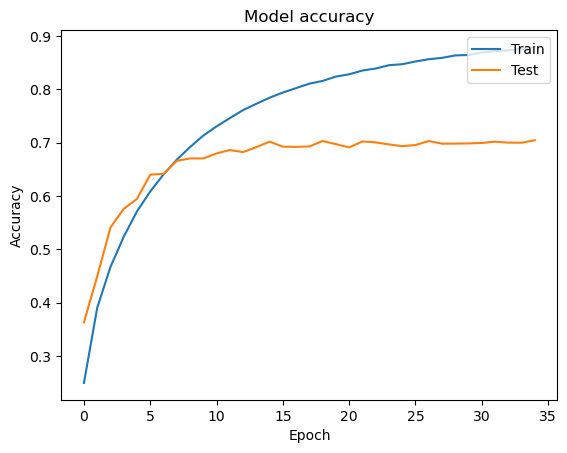

In [9]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(3, 3)))
# Dropout layers
model.add(Dropout(0.35))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(3, 3)))
# Dropout layers
model.add(Dropout(0.35))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.02)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('coarselabel3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

h_callback = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping,mc])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [11]:
visualkeras.layered_view(model,legend=True).show() # display using your system viewer

# Model Improvement

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_20 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_21 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

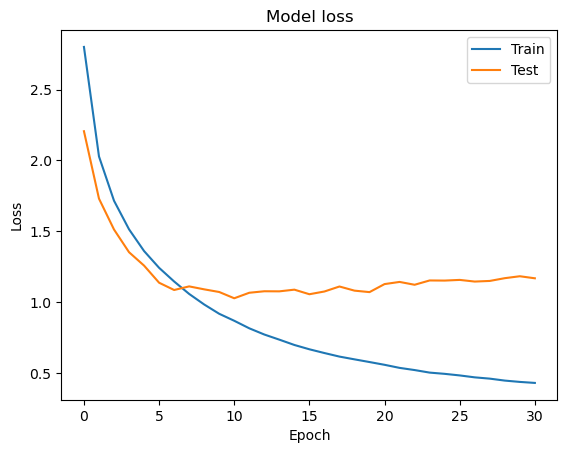

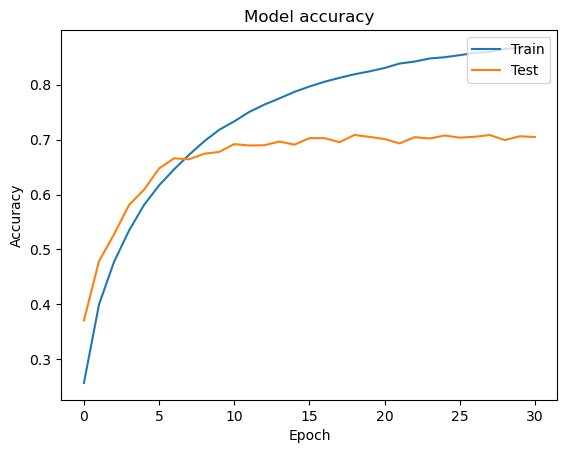

In [12]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.3))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(20, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.02)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('coarselabel2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

h_callback = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping,mc])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


In [14]:
del model 
gc.collect()

26397

# Model improvement 2 more dropout lesser layers

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_38 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_39 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

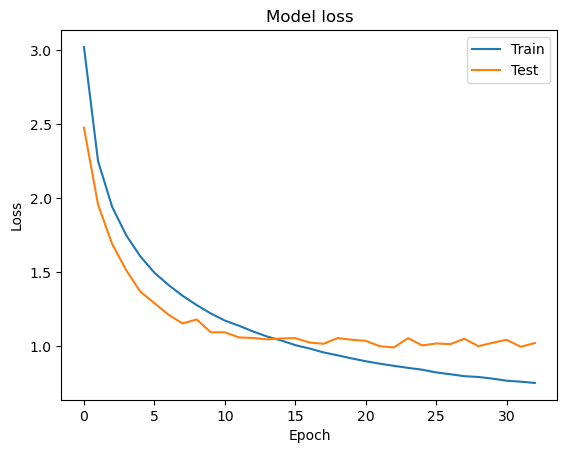

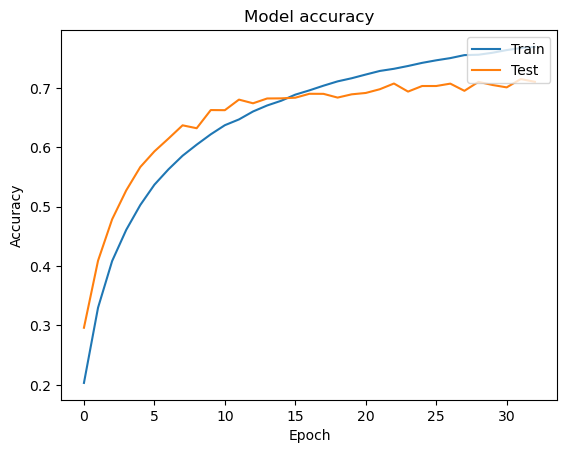

In [15]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))
# Convolutional Layer
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))
# Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='elu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.4))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.4))
model.add(Dense(20, activation='softmax',kernel_regularizer=tensorflow.keras.regularizers.L2(0.02)))

model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                patience=5, min_lr=0.001)
mc = ModelCheckpoint('coarselabel3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

h_callback = model.fit(X_train, y_train, epochs = 100,validation_data=(X_val, y_val),batch_size=256,callbacks=[early_stopping,mc])

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])
